In [1]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996)

In [2]:
fashion_mnist['data'].shape

(70000, 784)

In [3]:
fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [4]:
help(''.rsplit)

Help on built-in function rsplit:

rsplit(...) method of builtins.str instance
    S.rsplit(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string, starting at the end of the string and
    working to the front.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified, any whitespace string
    is a separator.



In [5]:
c = '0  T-shirt/top  \n1  Trouser  \n2  Pullover  \n3  Dress  \n4  Coat  \n5  Sandal  \n6  Shirt  \n7  Sneaker  \n8  Bag  \n9  Ankle boot'

fashion_label_translation = {
    int(k): v for k, v in [
        item.split(maxsplit=1) for item in c.split('\n')
    ]
}

fashion_label_translation


{0: 'T-shirt/top  ',
 1: 'Trouser  ',
 2: 'Pullover  ',
 3: 'Dress  ',
 4: 'Coat  ',
 5: 'Sandal  ',
 6: 'Shirt  ',
 7: 'Sneaker  ',
 8: 'Bag  ',
 9: 'Ankle boot'}

In [6]:
fashion_label_high_lebel_translation = {
    0: 'Apparel',
    1: 'Apparel',
    2: 'Apparel',
    3: 'Apparel',
    4: 'Apparel',
    5: 'Footwear',
    6: 'Apparel',
    7: 'Footwear',
    8: 'Accessory',
    9: 'Footwear',
}

In [7]:
def translate_label(y, translation=fashion_label_translation):
    return pd.Series(y).apply(
        lambda y: translation[int(y)]
    ).values

In [8]:
np.sqrt(fashion_mnist['data'].shape[1])

28.0

In [17]:
fashion_mnist['data'][0].shape

(784,)

In [20]:
from matplotlib.colors import ListedColormap

def display_fashion(img, target, ax):
    
    if len(img.shape) < 2:
        w = np.sqrt(img.shape[0]).astype(int)
        img = img.reshape((w, w))
    
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

In [13]:
from sklearn.model_selection import train_test_split

fashion_mnist_sample = {}

fashion_mnist_sample['data'], _, fashion_mnist_sample['target'], _ = train_test_split(
    fashion_mnist['data'], fashion_mnist['target'], train_size=10000
)

x, y = fashion_mnist_sample['data'], fashion_mnist_sample['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# translation = fashion_label_high_lebel_translation
translation = fashion_label_translation

y_train_translated = translate_label(y_train, translation=translation)
y_test_translated = translate_label(y_test, translation=translation)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


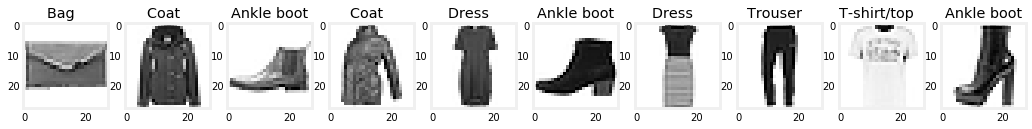

In [21]:
fig, axs = plt.subplots(1, 10, figsize=(16, 12))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[i])

fig.show()

In [25]:
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler

def convolve(x, kernel=[[0,-1,0], [-1,5,-1], [0,-1,0]]):
    w = int(np.sqrt(x.shape[1]))
    x = ndimage.convolve(x.reshape((x.shape[0], w, w)), [kernel], mode='reflect', cval=0.0) 
    x = x.reshape(x.shape[0], x.shape[1]*x.shape[2]) 
    x = MinMaxScaler().fit_transform(x)

    return x

In [56]:
kernel = [[0,-1,0], [-1,5,-1], [0,-1,0]]

x_train_conv = convolve(x_train, kernel)
x_test_conv = convolve(x_test, kernel) 

print(np.sqrt(x_test.shape[1]), np.sqrt(x_test_conv.shape[1]))

28.0 28.0


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


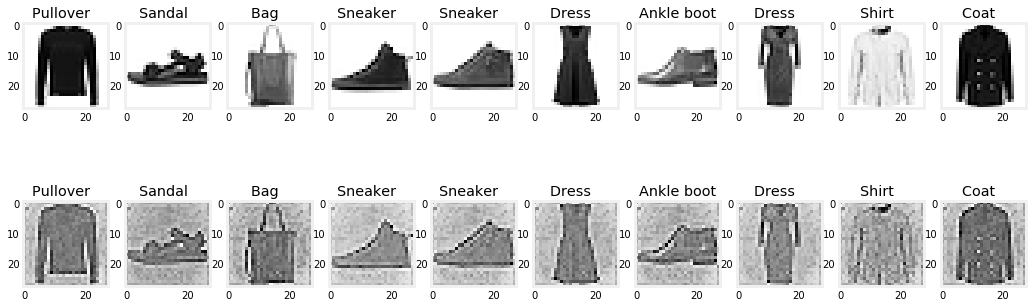

In [57]:
fig, axs = plt.subplots(2, 10, figsize=(16, 6))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[0][i])
    display_fashion(x_train_conv[rand], y_train_translated[rand], axs[1][i])

fig.show()

In [59]:
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler
from skimage.measure import block_reduce

def maxpool(x, size=(2,2)):
    w = int(np.sqrt(x.shape[1]))
    # x = ndimage.maximum_filter(x.reshape((x.shape[0], w, w)), size=(x.shape[0], size[0], size[1])) 
    x = np.array([block_reduce(img.reshape((w, w)), block_size=(size[0], size[1]), func=np.max) for img in x])
    x = x.reshape(x.shape[0], x.shape[1]*x.shape[2]) 
    x = MinMaxScaler().fit_transform(x)

    return x

In [66]:
x_train_maxpool = maxpool(x_train_conv, size=(2,2))
x_test_maxpool = maxpool(x_test_conv, size=(2,2)) 

print(np.sqrt(x_test_conv.shape[1]), np.sqrt(x_test_maxpool.shape[1]))

28.0 14.0


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


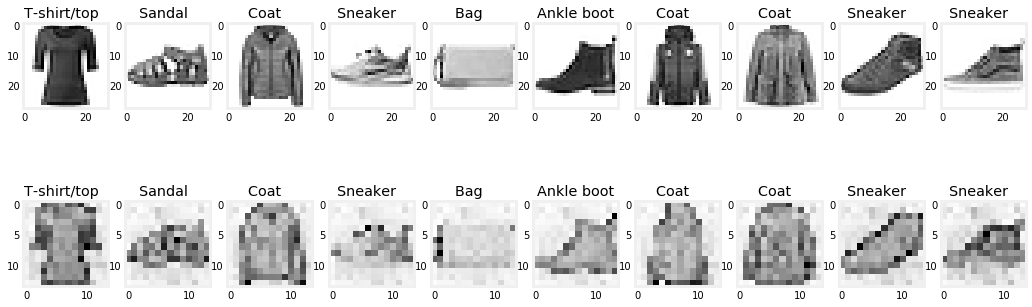

In [67]:
fig, axs = plt.subplots(2, 10, figsize=(16, 6))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[0][i])
    display_fashion(x_train_maxpool[rand], y_train_translated[rand], axs[1][i])

fig.show()